In [2]:
# Imports needed for Exercise 5
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random

In [3]:
# We read the raw data of dataCircles
with open('dataCircle.txt') as f:
    read_data = f.read()
f.close()
#raw_data = [data_line.rstrip().split() for data_line in read_data ]
#data = [tuple(map(lambda x: float(x), line)) for line in raw_data]

In [4]:
# Bringin Data into correct shape for the ongoing Algorithmn
read_data_string = read_data.split('\r')
data_circle_string= list(map(lambda x: x.split(), read_data_string))

\begin{align}
D = \{(x_i,y_i): x_i \in R^d, y_i \in \{-1,+1\}, i = 1,2,...,m\} m,d=(102,2)
\end{align}

In [ ]:
# We want the classes of {-1,+1}. The +1 is already 
data_circle = []
for liste in data_circle_string:
    data_circle.append(list(map(lambda x: float(x), liste)))
    if data_circle[-1][2] == 0.0:
        data_circle[-1][2] = -1.0

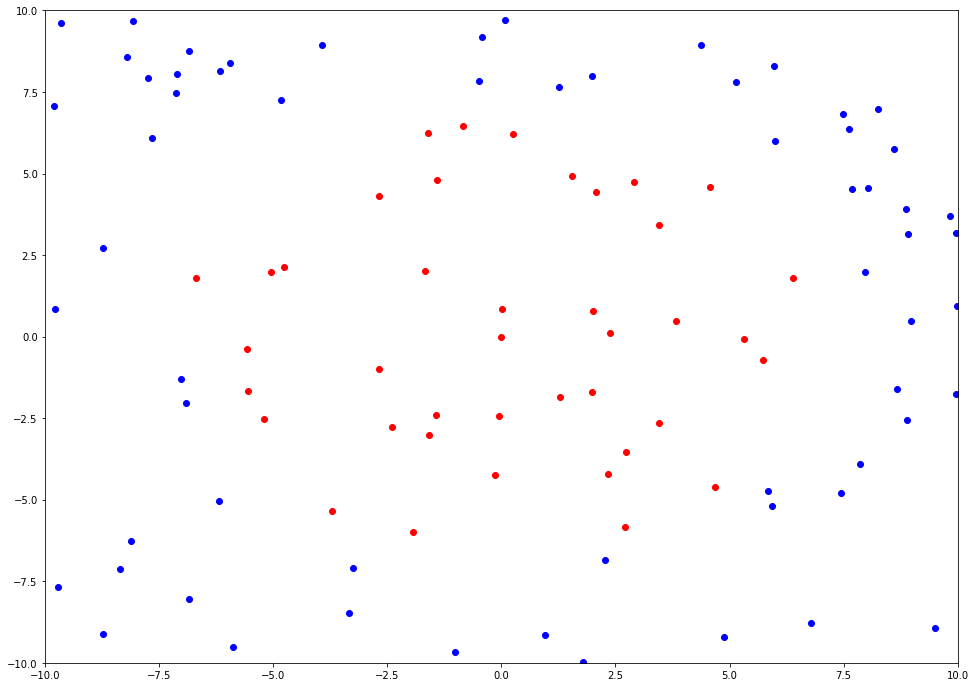

In [6]:
# We made sure that we got the right representation of the Data by comparing it to the erxercise sheet
#% matplotlib
fig = plt.figure(figsize=(36,12))
ax1 = fig.add_subplot(121)
ax1.plot([data_x[0] for data_x in data_circle[0:40]], [data_y[1] for data_y in data_circle[0:40]], "ro")
ax1.plot([data_x[0] for data_x in data_circle[40:]], [data_y[1] for data_y in data_circle[40:]], "bo")
ax1.axis([-10, 10, -10, 10])

plt.show()

\begin{align}
h_t : \mathbb{R}^d \rightarrow \{-1,+1\}
\end{align}

In [232]:
def get_weak_classifier(data):
    axis = random.choice([0, 1])
    val = random.uniform(-10, 10)
    corrects = 0
    faults = 0
    for point in data:
        if point[axis] < val and point[2] == 1:
            corrects += 1
        elif point[axis] >= val and point[2] == -1:
            corrects += 1
        else:
            faults += 1
    print( point[axis],val,point[2])
    if corrects > faults:
        return [lambda point: 1.0 if point[axis] < val else -1.0, axis, val,  corrects/float(len(data))]
    else:
        return [lambda point: -1.0 if point[axis] < val else 1.0,  axis, val,  faults/float(len(data))]
    

In [195]:
get_weak_classifier([[3.0,2.0,1.0]])

(2.0, -7.302756755630773, 1.0)


[<function __main__.<lambda>>, 1, -7.302756755630773, 1.0]

In [192]:
data_circle[0:3]

[[0.0, 0.0, 1.0], [-3.70962, -5.3521, 1.0], [-1.42211, -2.40219, 1.0]]

In [238]:
def error_of_weak_classifier(distribution, data, classifier):
    result = 0
    for index in range(len(data)):
        if classifier[0](data[index]) != data[index][2]:
            result += distribution[index]
    print(result)
    return result

In [146]:
def update_distribution(distribution, data, classifier):
    #print(error_of_weak_classifier(distribution, data, classifier))
    alph = alpha(error_of_weak_classifier(distribution, data, classifier))
    for i in range(len(data)):
        distribution[i] = 1/float(z(distribution, data, alph, classifier)) * distribution[i] * m.exp(-alph * data[i][2] * classifier[0](data[i]))
    return distribution

In [147]:
def z(distribution, data, alpha, classifier):
    corrects = []
    faults = []
    for i in range(len(data)):
        if classifier[0](data[i]) == data[i][2]:
            corrects.append([data[i], i])
        else:
            faults.append([data[i], i])
    sum1 = 0
    for point in corrects:
        sum1 += distribution[point[1]]*m.exp(-alpha)
    sum2 = 0
    for point in faults:
        sum2 += distribution[point[1]]*m.exp(alpha)
    return sum1 + sum2
    

In [113]:
def alpha(error):
    return 0.5 * (m.log((1-error)/float(error)))

In [217]:
def ada_boost(list_of_classifiers, data):
    distribution = [1/float(len(data)) for i in range(len(data))]
    error_list=[]
    for i in range(100):
        error_list = list(map(lambda x: error_of_weak_classifier(distribution, data, x), list_of_classifiers))
        min_error_classifier_index = error_list.index(min(error_list))
        distribution = update_distribution(distribution, data, list_of_classifiers[min_error_classifier_index])
    result = []
    for i in range(len(error_list)):
        result.append([alpha(error_list[i]), list_of_classifiers[i]])
    return result

In [218]:
def classify(point, strong_classifier):
    result = 0
    for weighted_classifier in strong_classifier:
        result += weighted_classifier[0]*weighted_classifier[1][0](point) 
    return np.sign(result)

In [239]:
list_of_cla = [get_weak_classifier(data_circle) for i in range(100)]
classifiers = ada_boost(list_of_cla, data_circle)


(7.86204, -3.0066002658097757, -1.0)
(-3.89495, -3.6288565272033217, -1.0)
(7.86204, 2.430381925138006, -1.0)
(-3.89495, 6.791691802403779, -1.0)
(-3.89495, -1.2314876827926806, -1.0)
(7.86204, 9.70439525138707, -1.0)
(7.86204, 3.0372936658488676, -1.0)
(-3.89495, 2.1191263348524974, -1.0)
(-3.89495, 5.179417930331002, -1.0)
(-3.89495, 1.9660412191796777, -1.0)
(7.86204, -7.468388712976049, -1.0)
(-3.89495, 1.3115247821213991, -1.0)
(7.86204, -6.352898679755232, -1.0)
(7.86204, -5.365144310091501, -1.0)
(-3.89495, -1.6206727311042073, -1.0)
(-3.89495, 4.257772007059327, -1.0)
(-3.89495, -7.4087021055385005, -1.0)
(-3.89495, -9.746324322091644, -1.0)
(7.86204, 0.09278939784036488, -1.0)
(-3.89495, -8.420015641426435, -1.0)
(7.86204, 5.29090919163086, -1.0)
(7.86204, -4.790191039561553, -1.0)
(7.86204, -4.253578970850342, -1.0)
(7.86204, 8.146008305176746, -1.0)
(7.86204, -8.39598382840202, -1.0)
(7.86204, -7.613910861376261, -1.0)
(-3.89495, -2.511610401738613, -1.0)
(7.86204, 5.0642361

0.578431372549
0.529411764706
0.549019607843
0.607843137255
0.519607843137
0.56862745098
0.578431372549
0.607843137255
0.617647058824
0.598039215686
0.509803921569
0.578431372549
0.558823529412
0.578431372549
0.539215686275
0.578431372549
0.5
0.598039215686
0.519607843137
0.519607843137
0.598039215686
0.56862745098
0.558823529412
0.509803921569
0.549019607843
0.509803921569
0.509803921569
0.607843137255
0.617647058824
0.5
0.578431372549
0.598039215686
0.578431372549
0.509803921569
0.578431372549
0.519607843137
0.5
0.578431372549
0.578431372549
0.549019607843
0.578431372549
0.529411764706
0.607843137255
0.607843137255
0.549019607843
0.539215686275
0.607843137255
0.607843137255
0.578431372549
0.578431372549
0.539215686275
0.578431372549
0.607843137255
0.56862745098
0.588235294118
0.519607843137
0.607843137255
0.529411764706
0.529411764706
0.529411764706
0.519607843137
0.5
0.519607843137
0.588235294118
0.56862745098
0.558823529412
0.529411764706
0.509803921569
0.509803921569
0.57843137254

0.56862745098
0.558823529412
0.509803921569
0.549019607843
0.509803921569
0.509803921569
0.607843137255
0.617647058824
0.5
0.578431372549
0.598039215686
0.578431372549
0.509803921569
0.578431372549
0.519607843137
0.5
0.578431372549
0.578431372549
0.549019607843
0.578431372549
0.529411764706
0.607843137255
0.607843137255
0.549019607843
0.539215686275
0.607843137255
0.607843137255
0.578431372549
0.578431372549
0.539215686275
0.578431372549
0.607843137255
0.56862745098
0.588235294118
0.519607843137
0.607843137255
0.529411764706
0.529411764706
0.529411764706
0.519607843137
0.5
0.519607843137
0.588235294118
0.56862745098
0.558823529412
0.529411764706
0.509803921569
0.509803921569
0.578431372549
0.578431372549
0.558823529412
0.519607843137
0.539215686275
0.529411764706
0.607843137255
0.598039215686
0.578431372549
0.539215686275
0.558823529412
0.519607843137
0.558823529412
0.578431372549
0.607843137255
0.5
0.588235294118
0.529411764706
0.509803921569
0.607843137255
0.578431372549
0.5784313725

0.588235294118
0.519607843137
0.607843137255
0.529411764706
0.529411764706
0.529411764706
0.519607843137
0.5
0.519607843137
0.588235294118
0.56862745098
0.558823529412
0.529411764706
0.509803921569
0.509803921569
0.578431372549
0.578431372549
0.558823529412
0.519607843137
0.539215686275
0.529411764706
0.607843137255
0.598039215686
0.578431372549
0.539215686275
0.558823529412
0.519607843137
0.558823529412
0.578431372549
0.607843137255
0.5
0.588235294118
0.529411764706
0.509803921569
0.607843137255
0.578431372549
0.578431372549
0.617647058824
0.598039215686
0.509803921569
0.617647058824
0.549019607843
0.598039215686
0.607843137255
0.56862745098
0.588235294118
0.5
0.578431372549
0.529411764706
0.549019607843
0.607843137255
0.519607843137
0.56862745098
0.578431372549
0.607843137255
0.617647058824
0.598039215686
0.509803921569
0.578431372549
0.558823529412
0.578431372549
0.539215686275
0.578431372549
0.5
0.598039215686
0.519607843137
0.519607843137
0.598039215686
0.56862745098
0.55882352941

0.56862745098
0.588235294118
0.519607843137
0.607843137255
0.529411764706
0.529411764706
0.529411764706
0.519607843137
0.5
0.519607843137
0.588235294118
0.56862745098
0.558823529412
0.529411764706
0.509803921569
0.509803921569
0.578431372549
0.578431372549
0.558823529412
0.519607843137
0.539215686275
0.529411764706
0.607843137255
0.598039215686
0.578431372549
0.539215686275
0.558823529412
0.519607843137
0.558823529412
0.578431372549
0.607843137255
0.5
0.588235294118
0.529411764706
0.509803921569
0.607843137255
0.578431372549
0.578431372549
0.617647058824
0.598039215686
0.509803921569
0.617647058824
0.549019607843
0.598039215686
0.607843137255
0.56862745098
0.588235294118
0.5
0.578431372549
0.529411764706
0.549019607843
0.607843137255
0.519607843137
0.56862745098
0.578431372549
0.607843137255
0.617647058824
0.598039215686
0.509803921569
0.578431372549
0.558823529412
0.578431372549
0.539215686275
0.578431372549
0.5
0.598039215686
0.519607843137
0.519607843137
0.598039215686
0.56862745098

0.558823529412
0.578431372549
0.607843137255
0.5
0.588235294118
0.529411764706
0.509803921569
0.607843137255
0.578431372549
0.578431372549
0.617647058824
0.598039215686
0.509803921569
0.617647058824
0.549019607843
0.598039215686
0.607843137255
0.56862745098
0.588235294118
0.5
0.578431372549
0.529411764706
0.549019607843
0.607843137255
0.519607843137
0.56862745098
0.578431372549
0.607843137255
0.617647058824
0.598039215686
0.509803921569
0.578431372549
0.558823529412
0.578431372549
0.539215686275
0.578431372549
0.5
0.598039215686
0.519607843137
0.519607843137
0.598039215686
0.56862745098
0.558823529412
0.509803921569
0.549019607843
0.509803921569
0.509803921569
0.607843137255
0.617647058824
0.5
0.578431372549
0.598039215686
0.578431372549
0.509803921569
0.578431372549
0.519607843137
0.5
0.578431372549
0.578431372549
0.549019607843
0.578431372549
0.529411764706
0.607843137255
0.607843137255
0.549019607843
0.539215686275
0.607843137255
0.607843137255
0.578431372549
0.578431372549
0.539215

0.529411764706
0.529411764706
0.519607843137
0.5
0.519607843137
0.588235294118
0.56862745098
0.558823529412
0.529411764706
0.509803921569
0.509803921569
0.578431372549
0.578431372549
0.558823529412
0.519607843137
0.539215686275
0.529411764706
0.607843137255
0.598039215686
0.578431372549
0.539215686275
0.558823529412
0.519607843137
0.558823529412
0.578431372549
0.607843137255
0.5
0.588235294118
0.529411764706
0.509803921569
0.607843137255
0.578431372549
0.578431372549
0.617647058824
0.598039215686
0.509803921569
0.617647058824
0.549019607843
0.598039215686
0.607843137255
0.56862745098
0.588235294118
0.5
0.578431372549
0.529411764706
0.549019607843
0.607843137255
0.519607843137
0.56862745098
0.578431372549
0.607843137255
0.617647058824
0.598039215686
0.509803921569
0.578431372549
0.558823529412
0.578431372549
0.539215686275
0.578431372549
0.5
0.598039215686
0.519607843137
0.519607843137
0.598039215686
0.56862745098
0.558823529412
0.509803921569
0.549019607843
0.509803921569
0.50980392156

0.578431372549
0.529411764706
0.549019607843
0.607843137255
0.519607843137
0.56862745098
0.578431372549
0.607843137255
0.617647058824
0.598039215686
0.509803921569
0.578431372549
0.558823529412
0.578431372549
0.539215686275
0.578431372549
0.5
0.598039215686
0.519607843137
0.519607843137
0.598039215686
0.56862745098
0.558823529412
0.509803921569
0.549019607843
0.509803921569
0.509803921569
0.607843137255
0.617647058824
0.5
0.578431372549
0.598039215686
0.578431372549
0.509803921569
0.578431372549
0.519607843137
0.5
0.578431372549
0.578431372549
0.549019607843
0.578431372549
0.529411764706
0.607843137255
0.607843137255
0.549019607843
0.539215686275
0.607843137255
0.607843137255
0.578431372549
0.578431372549
0.539215686275
0.578431372549
0.607843137255
0.56862745098
0.588235294118
0.519607843137
0.607843137255
0.529411764706
0.529411764706
0.529411764706
0.519607843137
0.5
0.519607843137
0.588235294118
0.56862745098
0.558823529412
0.529411764706
0.509803921569
0.509803921569
0.57843137254

0.5
0.578431372549
0.529411764706
0.549019607843
0.607843137255
0.519607843137
0.56862745098
0.578431372549
0.607843137255
0.617647058824
0.598039215686
0.509803921569
0.578431372549
0.558823529412
0.578431372549
0.539215686275
0.578431372549
0.5
0.598039215686
0.519607843137
0.519607843137
0.598039215686
0.56862745098
0.558823529412
0.509803921569
0.549019607843
0.509803921569
0.509803921569
0.607843137255
0.617647058824
0.5
0.578431372549
0.598039215686
0.578431372549
0.509803921569
0.578431372549
0.519607843137
0.5
0.578431372549
0.578431372549
0.549019607843
0.578431372549
0.529411764706
0.607843137255
0.607843137255
0.549019607843
0.539215686275
0.607843137255
0.607843137255
0.578431372549
0.578431372549
0.539215686275
0.578431372549
0.607843137255
0.56862745098
0.588235294118
0.519607843137
0.607843137255
0.529411764706
0.529411764706
0.529411764706
0.519607843137
0.5
0.519607843137
0.588235294118
0.56862745098
0.558823529412
0.529411764706
0.509803921569
0.509803921569
0.5784313

0.578431372549
0.529411764706
0.549019607843
0.607843137255
0.519607843137
0.56862745098
0.578431372549
0.607843137255
0.617647058824
0.598039215686
0.509803921569
0.578431372549
0.558823529412
0.578431372549
0.539215686275
0.578431372549
0.5
0.598039215686
0.519607843137
0.519607843137
0.598039215686
0.56862745098
0.558823529412
0.509803921569
0.549019607843
0.509803921569
0.509803921569
0.607843137255
0.617647058824
0.5
0.578431372549
0.598039215686
0.578431372549
0.509803921569
0.578431372549
0.519607843137
0.5
0.578431372549
0.578431372549
0.549019607843
0.578431372549
0.529411764706
0.607843137255
0.607843137255
0.549019607843
0.539215686275
0.607843137255
0.607843137255
0.578431372549
0.578431372549
0.539215686275
0.578431372549
0.607843137255
0.56862745098
0.588235294118
0.519607843137
0.607843137255
0.529411764706
0.529411764706
0.529411764706
0.519607843137
0.5
0.519607843137
0.588235294118
0.56862745098
0.558823529412
0.529411764706
0.509803921569
0.509803921569
0.57843137254

0.578431372549
0.607843137255
0.617647058824
0.598039215686
0.509803921569
0.578431372549
0.558823529412
0.578431372549
0.539215686275
0.578431372549
0.5
0.598039215686
0.519607843137
0.519607843137
0.598039215686
0.56862745098
0.558823529412
0.509803921569
0.549019607843
0.509803921569
0.509803921569
0.607843137255
0.617647058824
0.5
0.578431372549
0.598039215686
0.578431372549
0.509803921569
0.578431372549
0.519607843137
0.5
0.578431372549
0.578431372549
0.549019607843
0.578431372549
0.529411764706
0.607843137255
0.607843137255
0.549019607843
0.539215686275
0.607843137255
0.607843137255
0.578431372549
0.578431372549
0.539215686275
0.578431372549
0.607843137255
0.56862745098
0.588235294118
0.519607843137
0.607843137255
0.529411764706
0.529411764706
0.529411764706
0.519607843137
0.5
0.519607843137
0.588235294118
0.56862745098
0.558823529412
0.529411764706
0.509803921569
0.509803921569
0.578431372549
0.578431372549
0.558823529412
0.519607843137
0.539215686275
0.529411764706
0.6078431372

In [241]:
classified_point = []
for point in data_circle:
    classified_point.append(classify(point, classifiers))
    

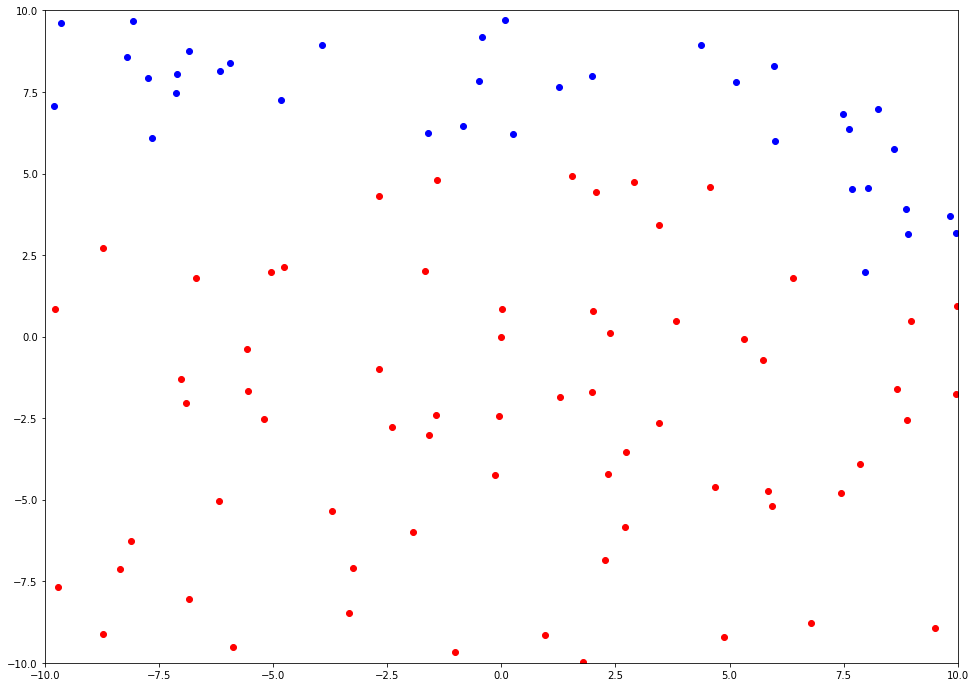

In [242]:
#Plot of the predicted point using Ada boost
#% matplotlib
fig = plt.figure(figsize=(36,12))
ax1 = fig.add_subplot(121)
for point in range(len(classified_point)):
    if classified_point[point] == 1.0:
        ax1.plot([data_circle[point][0]], [data_circle[point][1]], "ro")
    else:
        ax1.plot([data_circle[point][0]], [data_circle[point][1]], "bo")
ax1.axis([-10, 10, -10, 10])

plt.show()

In [243]:
print(classified_point)

[1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0]
